# **Linear regression model:**
* A supervised learning algorithm used for predicting a continuous outcome variable (also called the dependent variable) based on one or more predictor variables (also called independent variables).
The relationship between the variables is assumed to be linear.
* Finds the best-fitting straight line through the data points by minimizing the error

## Equations of Linear Regression:

Simple Linear Regression: $$y = wx + b$$

Multiple Linear Regression: $$y = w_0x_0 + w_1x_1 + w_2x_2 + \cdots + w_nx_n + b$$

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error, root_mean_squared_error
from sklearn.pipeline import make_pipeline

## Simple Linear Regression

In [11]:
# Generating data
np.random.seed(0)
X = np.random.rand(100, 1)

w = 3
b = np.random.randn(100, 1)

y = w * X + b

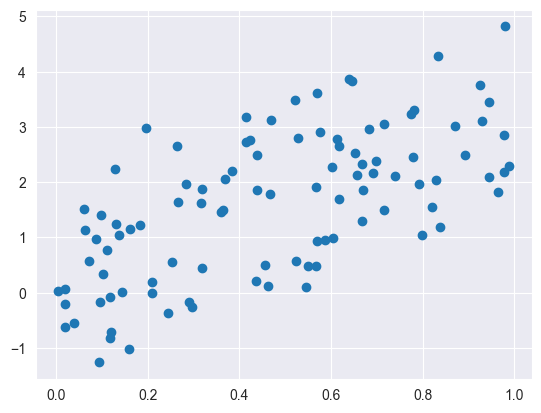

In [12]:
plt.scatter(X, y)
plt.show()

### Train-Test Split:

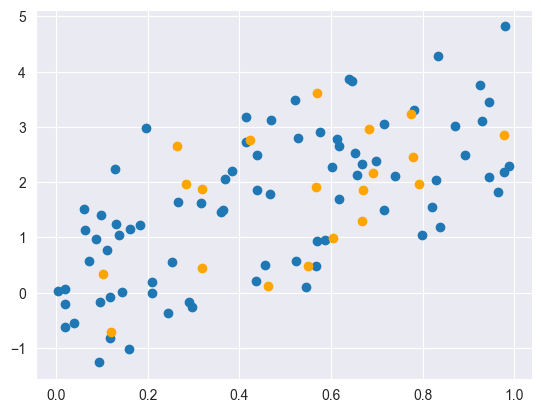

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test, color='orange')
plt.show()


### Model:
### Linear regression model

In [14]:
model = LinearRegression()
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [15]:
print("W: ", model.coef_)
print("b: ", model.intercept_)

W:  [[2.9805182]]
b:  [0.20634019]


### Predict:

In [16]:
y_pred = model.predict(x_test)

### Model Evaluation:
### Calculate error

In [17]:
mae = mean_absolute_error(y_pred, y_test)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_pred, y_test)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error :     ", mae)
print("Mean Squared Error :      ", mse)
print("Root Mean Squared Error : ", rmse)
print("R-Squared Score :         ", r2)

Mean Absolute Error :      0.8014554834253331
Mean Squared Error :       0.9177532469714291
Root Mean Squared Error :  0.9579943877557056
R-Squared Score :          0.29109095869239754


### Visualization:

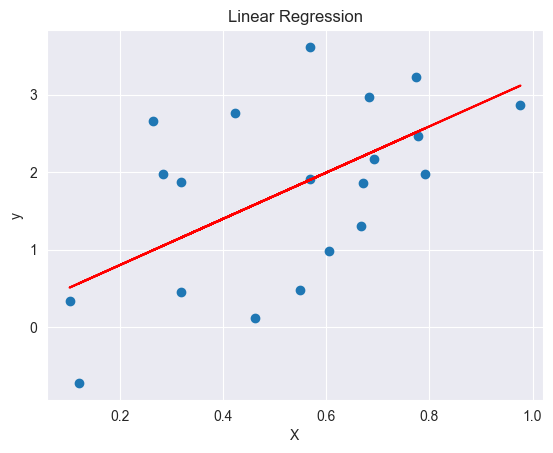

In [18]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.show()

## Regularization

In [3]:
# Generating data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 3 * X + np.random.randn(100, 1)
x_values = np.expand_dims(np.linspace(0,2), 1)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# sample Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'Linear Regression MSE: {mean_squared_error(y_test, y_pred)}')
print(f'Linear Regression R^2: {r2_score(y_test, y_pred)}')
print("_"*50)


# Ridge Regression
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
print(f'Ridge Regression MSE: {mean_squared_error(y_test, y_pred_ridge)}')
print(f'Ridge Regression R^2: {r2_score(y_test, y_pred_ridge)}')
print("_"*50)


# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
print(f'Lasso Regression MSE: {mean_squared_error(y_test, y_pred_lasso)}')
print(f'Lasso Regression R^2: {r2_score(y_test, y_pred_lasso)}')

Linear Regression MSE: 0.9177532469714288
Linear Regression R^2: 0.6521157503858557
__________________________________________________
Ridge Regression MSE: 0.9170098982685365
Ridge Regression R^2: 0.6523975247152418
__________________________________________________
Lasso Regression MSE: 0.9155385904506884
Lasso Regression R^2: 0.6529552397850087


In [6]:
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)
print(f'Polynomial Regression (Degree 2) MSE: {mean_squared_error(y_test, y_pred_poly)}')
print(f'Polynomial Regression (Degree 2) R^2: {r2_score(y_test, y_pred_poly)}')


Polynomial Regression (Degree 2) MSE: 0.9116159861274976
Polynomial Regression (Degree 2) R^2: 0.6544421451879694


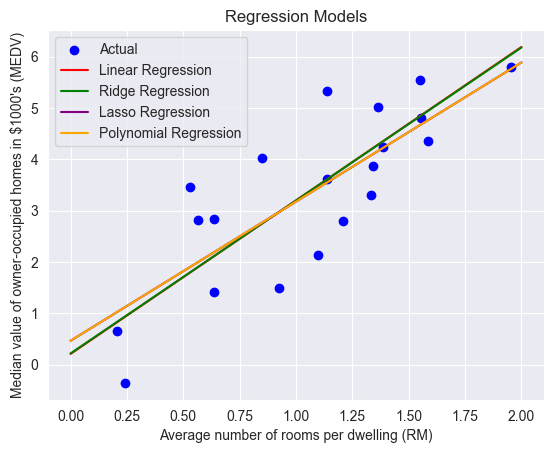

In [7]:
linear_line = model.predict(x_values)
ridge_line = ridge.predict(x_values)
lasso_line = lasso.predict(x_values)
poly_line = lasso.predict(x_values)

plt.scatter(X_test, y_test, color='blue', label='Actual')

plt.plot(x_values, linear_line, color='red', label='Linear Regression')
plt.plot(x_values, ridge_line, color='green', label='Ridge Regression')
plt.plot(x_values, lasso_line, color='purple', label='Lasso Regression')
plt.plot(x_values, poly_line, color='orange', label='Polynomial Regression')

plt.xlabel('Average number of rooms per dwelling (RM)')
plt.ylabel('Median value of owner-occupied homes in $1000\'s (MEDV)')
plt.title('Regression Models')
plt.legend()
plt.show()

## Polynomial Regression

In [32]:
# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [34]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
# Define degrees for polynomial regression
degrees = [1, 2, 5, 10]

# Initialize lists to store errors
train_errors = []
test_errors = []

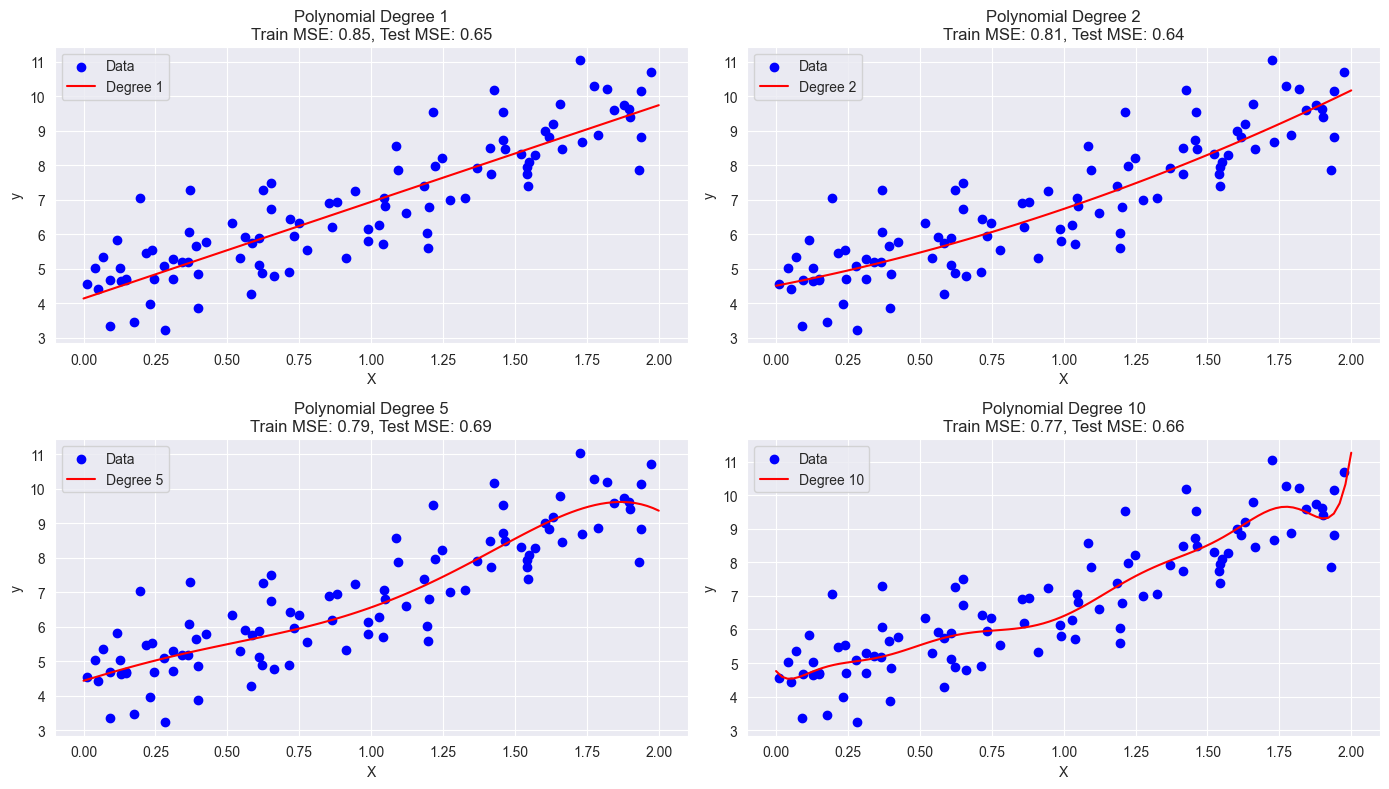

In [36]:
plt.figure(figsize=(14, 8))

# Loop over different polynomial degrees
for i, degree in enumerate(degrees):
    # Create polynomial regression model
    poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

    # Fit the model to the training data
    poly_model.fit(X_train, y_train)

    # Predict on training and testing data
    y_train_pred = poly_model.predict(X_train)
    y_test_pred = poly_model.predict(X_test)

    # Calculate mean squared errors
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    # Store errors
    train_errors.append(train_mse)
    test_errors.append(test_mse)

    line = np.expand_dims(np.linspace(0, 2, 100), 1)

    # Plot the model's predictions
    plt.subplot(2, 2, i+1)
    plt.scatter(X, y, color='blue', label='Data')
    plt.plot(line, poly_model.predict(line), color='red', label=f'Degree {degree}')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title(f'Polynomial Degree {degree}\nTrain MSE: {train_mse:.2f}, Test MSE: {test_mse:.2f}')
    plt.legend()

plt.tight_layout()
plt.show()


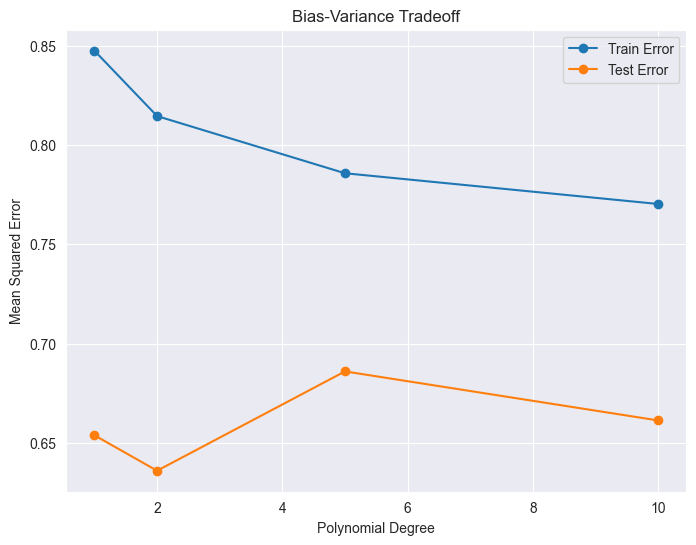

In [37]:
# Plot training and testing errors
plt.figure(figsize=(8, 6))
plt.plot(degrees, train_errors, label='Train Error', marker='o')
plt.plot(degrees, test_errors, label='Test Error', marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('Bias-Variance Tradeoff')
plt.legend()
plt.show()

## Gradient Descent & Mini-Batches GD & Stochastic GD ( توضيح ليس الا )

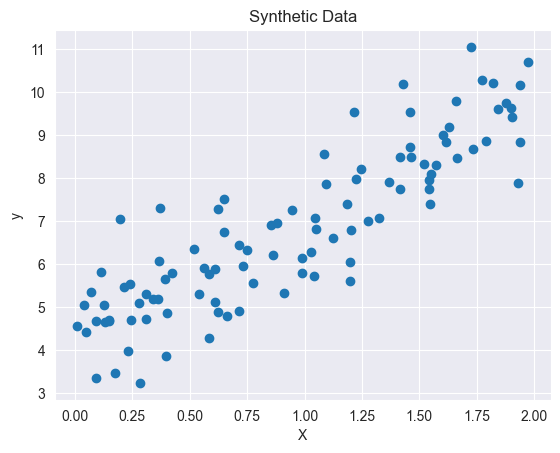

In [8]:
# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Plot the data
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Synthetic Data')
plt.show()

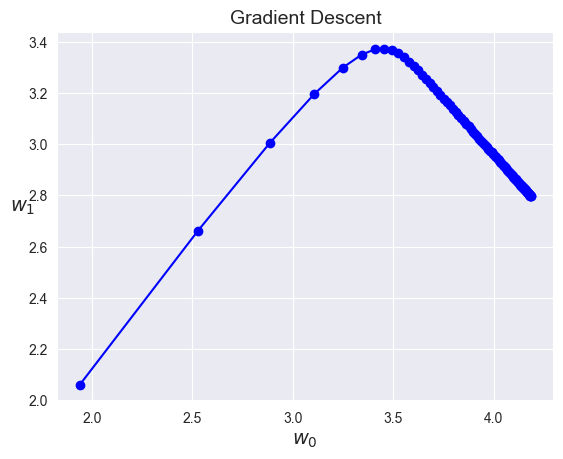

In [13]:
def plot_gradient_descent(theta_path, title):
    plt.plot(theta_path[:, 0], theta_path[:, 1], 'b-o')
    plt.xlabel(r'$w_0$', fontsize=14)
    plt.ylabel(r'$w_1$', fontsize=14, rotation=0)
    plt.title(title, fontsize=14)
    plt.grid(True)


def batch_gradient_descent(X, y, learning_rate=0.1, n_iterations=100):
    m = len(X)
    X_b = np.c_[np.ones((m, 1)), X]  # add x0 = 1 to each instance
    theta = np.random.randn(2, 1)  # random initialization
    theta_path = []

    for iteration in range(n_iterations):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - learning_rate * gradients
        theta_path.append(theta.ravel())

    return np.array(theta_path)


theta_path_batch = batch_gradient_descent(X, y)
plot_gradient_descent(theta_path_batch, "Gradient Descent")
plt.show()

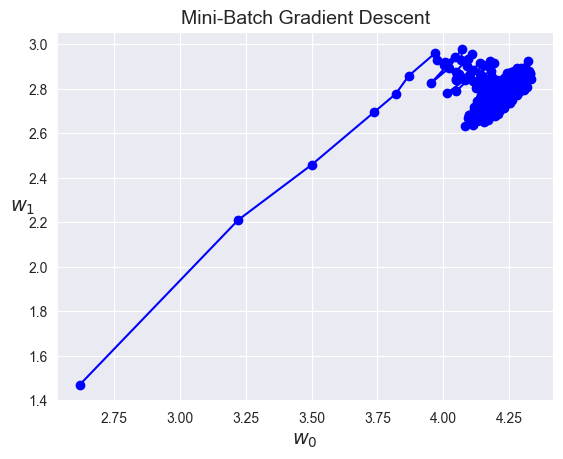

In [14]:
def mini_batch_gradient_descent(X, y, learning_rate=0.1, n_iterations=1000, batch_size=20):
    m = len(X)
    X_b = np.c_[np.ones((m, 1)), X]  # add x0 = 1 to each instance
    theta = np.random.randn(2, 1)  # random initialization
    theta_path = []

    for iteration in range(n_iterations):
        shuffled_indices = np.random.permutation(m)
        X_b_shuffled = X_b[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        for i in range(0, m, batch_size):
            xi = X_b_shuffled[i:i+batch_size]
            yi = y_shuffled[i:i+batch_size]
            gradients = 2/len(xi) * xi.T.dot(xi.dot(theta) - yi)
            theta = theta - learning_rate * gradients
            theta_path.append(theta.ravel())

    return np.array(theta_path)

theta_path_mini_batch = mini_batch_gradient_descent(X, y)
plot_gradient_descent(theta_path_mini_batch, "Mini-Batch Gradient Descent")
plt.show()


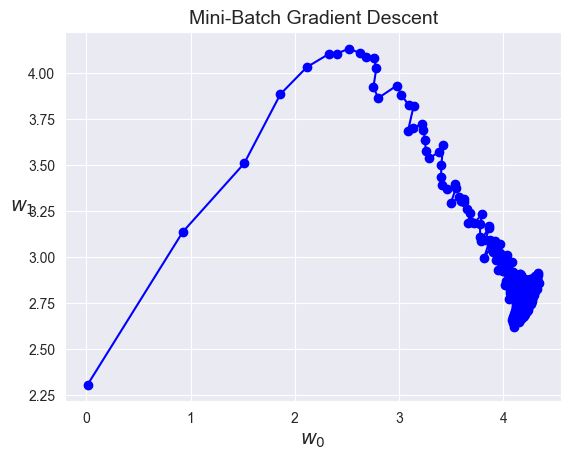

In [15]:
def mini_batch_gradient_descent(X, y, learning_rate=0.1, n_iterations=1000, batch_size=20):
    m = len(X)
    X_b = np.c_[np.ones((m, 1)), X]  # add x0 = 1 to each instance
    theta = np.random.randn(2, 1)  # random initialization
    theta_path = []

    for iteration in range(n_iterations):
        shuffled_indices = np.random.permutation(m)
        X_b_shuffled = X_b[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        for i in range(0, m, batch_size):
            xi = X_b_shuffled[i:i+batch_size]
            yi = y_shuffled[i:i+batch_size]
            gradients = 2/len(xi) * xi.T.dot(xi.dot(theta) - yi)
            theta = theta - learning_rate * gradients
            theta_path.append(theta.ravel())

    return np.array(theta_path)

theta_path_mini_batch = mini_batch_gradient_descent(X, y)
plot_gradient_descent(theta_path_mini_batch, "Mini-Batch Gradient Descent")
plt.show()


In [16]:
# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Add x0 = 1 to each instance
X_b = np.c_[np.ones((len(X), 1)), X]

# Cost function
def compute_cost(theta, X, y):
    m = len(y)
    return (1 / (2 * m)) * np.sum((X.dot(theta) - y) ** 2)

def plot_3d_surface(X, y):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    theta0_vals = np.linspace(-10, 10, 100)
    theta1_vals = np.linspace(-1, 4, 100)
    theta0_vals, theta1_vals = np.meshgrid(theta0_vals, theta1_vals)
    cost_vals = np.array([compute_cost(np.array([t0, t1]), X, y) for t0, t1 in zip(np.ravel(theta0_vals), np.ravel(theta1_vals))])
    cost_vals = cost_vals.reshape(theta0_vals.shape)

    ax.plot_surface(theta0_vals, theta1_vals, cost_vals, cmap='viridis', edgecolor='none', alpha=0.7)
    ax.set_xlabel(r'$w_0$', fontsize=14)
    ax.set_ylabel(r'$w_1$', fontsize=14)
    ax.set_zlabel('Cost', fontsize=14)
    return ax


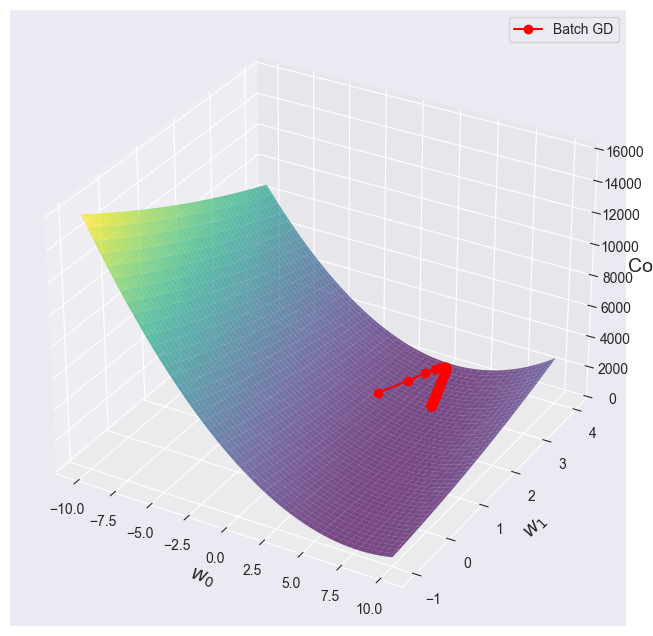

In [17]:
def batch_gradient_descent(X, y, learning_rate=0.1, n_iterations=100):
    m = len(X)
    theta = np.random.randn(2, 1)  # random initialization
    theta_path = []

    for iteration in range(n_iterations):
        gradients = 2/m * X.T.dot(X.dot(theta) - y)
        theta = theta - learning_rate * gradients
        theta_path.append(theta.ravel())

    return np.array(theta_path)

theta_path_batch = batch_gradient_descent(X_b, y)
ax = plot_3d_surface(X_b, y)
ax.plot(theta_path_batch[:, 0], theta_path_batch[:, 1], np.array([compute_cost(theta, X_b, y) for theta in theta_path_batch]), 'r-o', label='Batch GD')
ax.legend()
plt.show()


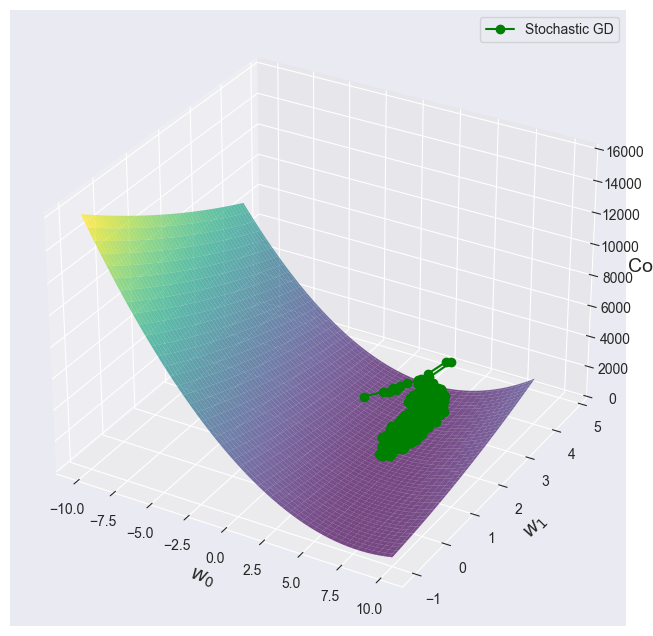

In [18]:
def stochastic_gradient_descent(X, y, learning_rate=0.1, n_epochs=50):
    m = len(X)
    theta = np.random.randn(2, 1)  # random initialization
    theta_path = []

    for epoch in range(n_epochs):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = X[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
            theta = theta - learning_rate * gradients
            theta_path.append(theta.ravel())

    return np.array(theta_path)

theta_path_sgd = stochastic_gradient_descent(X_b, y)
ax = plot_3d_surface(X_b, y)
ax.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], np.array([compute_cost(theta, X_b, y) for theta in theta_path_sgd]), 'g-o', label='Stochastic GD')
ax.legend()
plt.show()


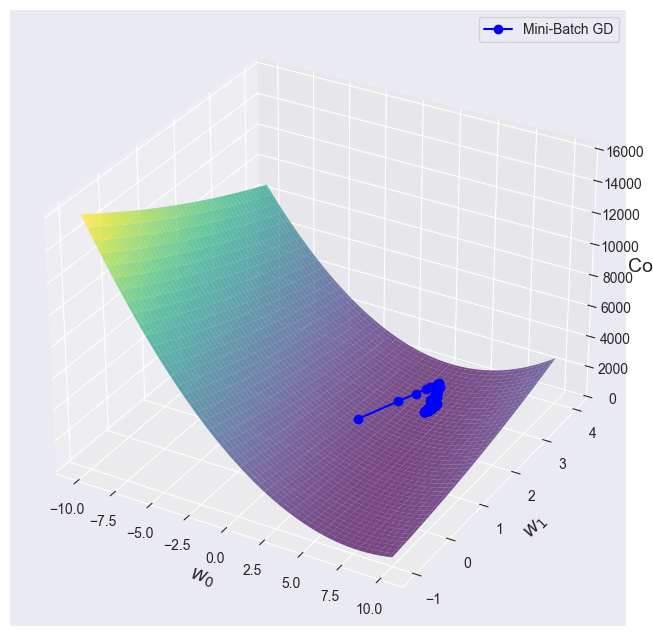

In [19]:
def mini_batch_gradient_descent(X, y, learning_rate=0.1, n_iterations=1000, batch_size=20):
    m = len(X)
    theta = np.random.randn(2, 1)  # random initialization
    theta_path = []

    for iteration in range(n_iterations):
        shuffled_indices = np.random.permutation(m)
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        for i in range(0, m, batch_size):
            xi = X_shuffled[i:i+batch_size]
            yi = y_shuffled[i:i+batch_size]
            gradients = 2/len(xi) * xi.T.dot(xi.dot(theta) - yi)
            theta = theta - learning_rate * gradients
            theta_path.append(theta.ravel())

    return np.array(theta_path)

theta_path_mini_batch = mini_batch_gradient_descent(X_b, y)
ax = plot_3d_surface(X_b, y)
ax.plot(theta_path_mini_batch[:, 0], theta_path_mini_batch[:, 1], np.array([compute_cost(theta, X_b, y) for theta in theta_path_mini_batch]), 'b-o', label='Mini-Batch GD')
ax.legend()
plt.show()
